<h1>1. Importing Python Packages and Datasets</h1>

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [178]:
trainingDataset = pd.read_csv('train_s3TEQDk.csv')
testDataset = pd.read_csv('test_mSzZ8RL.csv')
trainingDataset.head(10)


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [179]:
print('The number of rows in train data is' , trainingDataset.shape[0])

The number of rows in train data is 245725


In [180]:
testDataset.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [181]:
print('The number of rows in test data is' , testDataset.shape[0])

The number of rows in test data is 105312


<h1>2. Missing Values and Data Pre-processing<h1>

In [182]:
trainingDataset.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [183]:
print('Percent of missing "Credit_Product" is ' ,(trainingDataset['Credit_Product'].isnull().sum()/trainingDataset.shape[0])*100)

Percent of missing "Credit_Product" is  11.9340726421813


<p> Above 10% data is missing. Evaluating Credit_Product Column </p>

Credit Product grouped by (Yes = Have a Credit Product, No = Do not have Credit Product):
No     144357
Yes     72043
Name: Credit_Product, dtype: int64

The probability of having Credit_Product as NO or Yes is
 No     0.667084
Yes    0.332916
Name: Credit_Product, dtype: float64


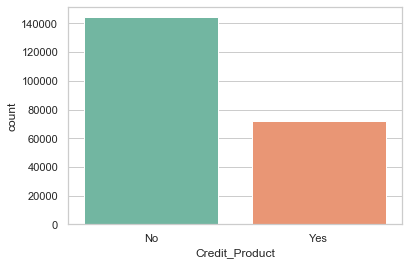

In [184]:
print('Credit Product grouped by (Yes = Have a Credit Product, No = Do not have Credit Product):')
print(trainingDataset['Credit_Product'].value_counts())
print('\nThe probability of having Credit_Product as NO or Yes is\n',trainingDataset['Credit_Product'].value_counts('No') )
sns.countplot(x='Credit_Product', data=trainingDataset, palette='Set2')
plt.show()

<h1>3. Adjusting Data<h1>

<p> 1. Filling the 'Credit_Product field using Interpolation method of 'ForwardFill', so as to reduce the biasing towards 
        most frequent category i.e 'No'<p>
<p> 2. Dropping the column 'Region_Code' and 'ID' because less Relevance on classification<p>


In [185]:
trainingDataset=trainingDataset.fillna(method = 'ffill')
trainingDataset.drop('Region_Code',axis=1, inplace=True)
trainingDataset.drop('ID', axis=1, inplace=True)

In [186]:
trainingDataset.isnull().sum()

Gender                 0
Age                    0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

Credit Product grouped by (Yes = Have a Credit Product, No = Do not have Credit Product):
No     163751
Yes     81974
Name: Credit_Product, dtype: int64

The probability of having Credit_Product as NO or Yes is
 No     0.666399
Yes    0.333601
Name: Credit_Product, dtype: float64


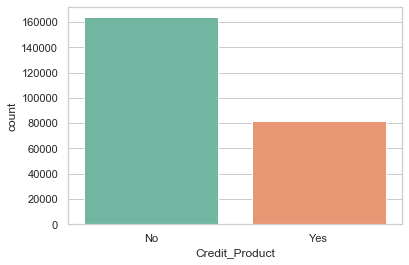

In [187]:
print('Credit Product grouped by (Yes = Have a Credit Product, No = Do not have Credit Product):')
print(trainingDataset['Credit_Product'].value_counts())
print('\nThe probability of having Credit_Product as NO or Yes is\n',trainingDataset['Credit_Product'].value_counts('No') )
sns.countplot(x='Credit_Product', data=trainingDataset, palette='Set2')
plt.show()

<h3> As seen above Probability of occurance of Yes and No remains same, hence biasing didn't happen after filling missing values</h3>

In [188]:
trainingDataset.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,Other,X3,43,No,1045696,No,0
1,Female,30,Salaried,X1,32,No,581988,No,0
2,Female,56,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,Salaried,X1,19,No,470454,No,0
4,Female,30,Salaried,X1,33,No,886787,No,0


In [189]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data = trainingDataset.copy()
train_data['Gender'] = le.fit_transform(train_data['Gender'])
train_data['Credit_Product'] = le.fit_transform(train_data['Credit_Product'])
train_data['Is_Active'] = le.fit_transform(train_data['Is_Active'])

train_data=pd.get_dummies(train_data, columns=["Occupation","Channel_Code"])
train_data.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,0,73,43,0,1045696,0,0,0,1,0,0,0,0,1,0
1,0,30,32,0,581988,0,0,0,0,1,0,1,0,0,0
2,0,56,26,0,1484315,1,0,0,0,0,1,0,0,1,0
3,1,34,19,0,470454,0,0,0,0,1,0,1,0,0,0
4,0,30,33,0,886787,0,0,0,0,1,0,1,0,0,0


<h1>4. Applying Same Changes to Test Dataset</h1>

In [190]:
testDataset.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [191]:
print('Percent of missing "Credit_Product" is ' ,(testDataset['Credit_Product'].isnull().sum()/testDataset.shape[0])*100)
test_data = testDataset.copy()
test_data=testDataset.fillna(method = 'ffill')
test_data.drop('Region_Code',axis=1, inplace=True)
test_data.drop('ID', axis=1, inplace=True)
print('After Adjusting Data')
test_data.isnull().sum()

Percent of missing "Credit_Product" is  11.890382862351869
After Adjusting Data


Gender                 0
Age                    0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [192]:
test_data['Gender'] = le.fit_transform(test_data['Gender'])
test_data['Credit_Product'] = le.fit_transform(test_data['Credit_Product'])
test_data['Is_Active'] = le.fit_transform(test_data['Is_Active'])

test_data=pd.get_dummies(test_data, columns=["Occupation","Channel_Code"])
test_data.head()

,Gender,Age,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
0,1,29,25,1,742366,0,0,1,0,0,1,0,0,0
1,1,43,49,1,925537,0,0,1,0,0,0,1,0,0
2,1,31,14,0,215949,0,0,0,1,0,1,0,0,0
3,1,29,33,0,868070,0,0,1,0,0,1,0,0,0
4,0,29,19,0,657087,0,0,1,0,0,1,0,0,0


<h1>5. EDA</h1>

<h3>A. Exploration of Age Variable</h3>

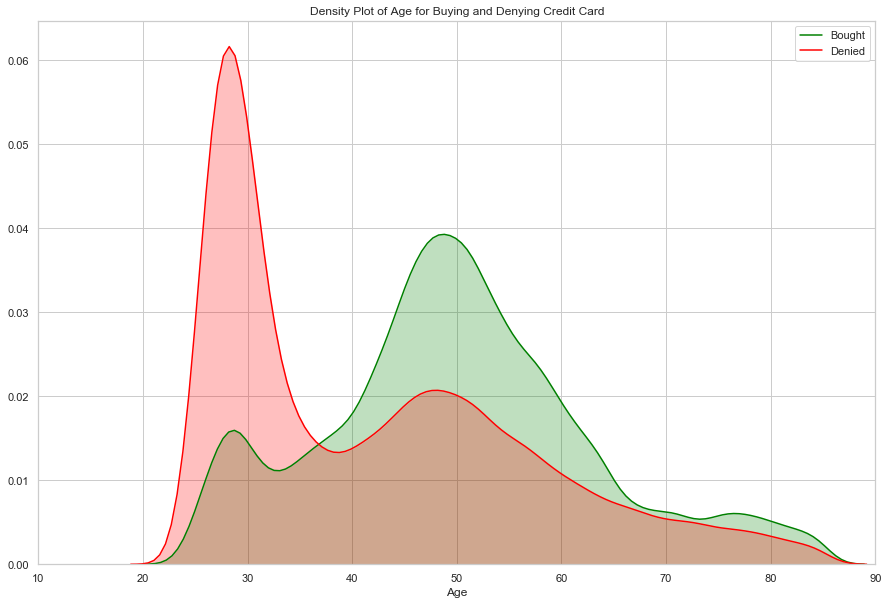

In [193]:
plt.figure(figsize=(15,10))
kdePlot = sns.kdeplot(train_data["Age"][train_data.Is_Lead == 1], color="green", shade=True)
sns.kdeplot(train_data["Age"][train_data.Is_Lead == 0], color="red", shade=True)
plt.legend(['Bought', 'Denied'])
plt.title('Density Plot of Age for Buying and Denying Credit Card')
kdePlot.set(xlabel='Age')
plt.xlim(10,90)
plt.show()

<p>From Above graph its safe to say that people between age group 20 and 35 mostly denied buying a credit card.</p>
<p>Also people from age group 35 to 65 mostly bought Credit Card</p>
    

<h3>B. Exploration of Gender Variable</h3>

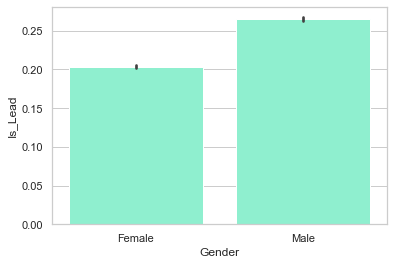

In [194]:
sns.barplot('Gender', 'Is_Lead', data=trainingDataset, color="aquamarine")
plt.show()

<p>Although there's more number of Male customers than Female customers, but the difference is not significant enough to classify</p>

<h3>C. Exploration of Occupation</h3>

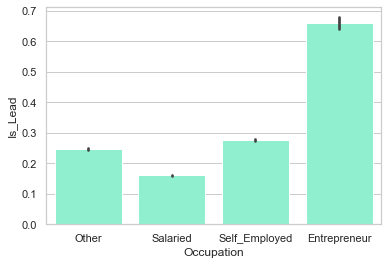

In [195]:
sns.barplot('Occupation', 'Is_Lead', data=trainingDataset, color="aquamarine")
plt.show()

<p>It Seems that Entrepreneurs preferred having a credit card more than any other Occupation Category and Salaried Customers are least likely to buy a credit card</p>

<h3>D. Exploration of Average Account Balance Variable</h3>

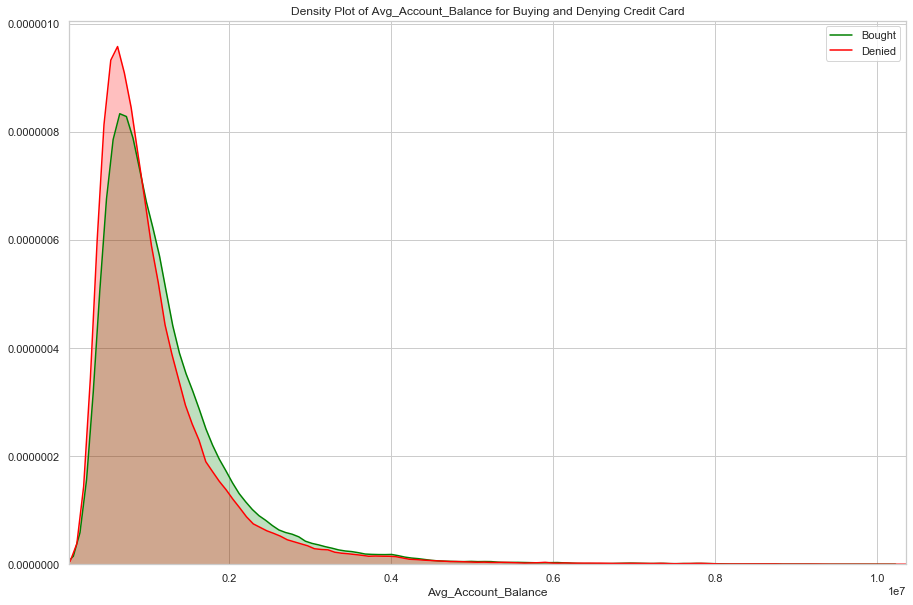

In [196]:
plt.figure(figsize=(15,10))
kdePlot = sns.kdeplot(train_data["Avg_Account_Balance"][train_data.Is_Lead == 1], color="green", shade=True)
sns.kdeplot(train_data["Avg_Account_Balance"][train_data.Is_Lead == 0], color="red", shade=True)
plt.legend(['Bought', 'Denied'])
plt.title('Density Plot of Avg_Account_Balance for Buying and Denying Credit Card')
kdePlot.set(xlabel='Avg_Account_Balance')
plt.xlim(min(train_data['Avg_Account_Balance']),max(train_data['Avg_Account_Balance']))
plt.show()

<p>Average Salary Doesn't make a difference on Customer's decision of buuying a credit Card</p>

<h3>E. Exploration of Vintage Variable</h3>

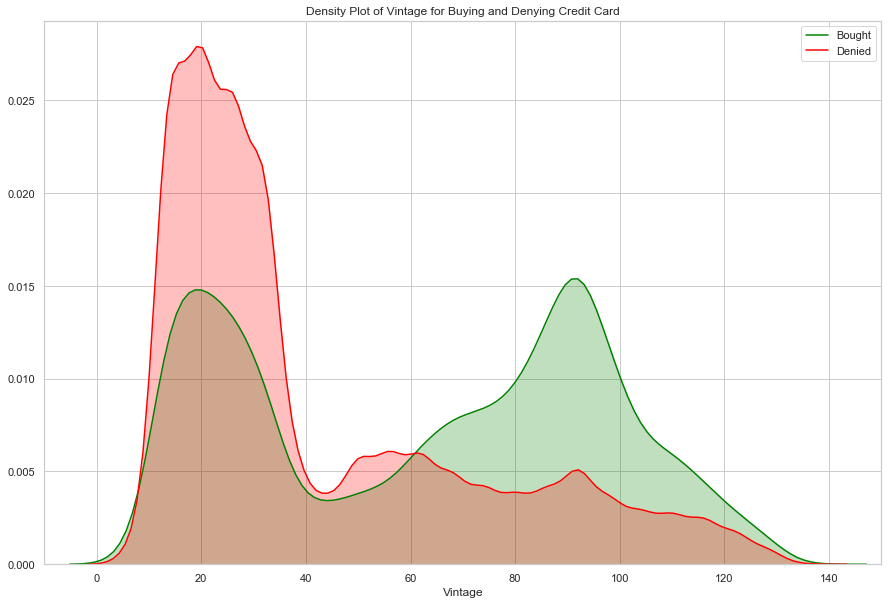

In [197]:
plt.figure(figsize=(15,10))
kdePlot = sns.kdeplot(train_data["Vintage"][train_data.Is_Lead == 1], color="green", shade=True)
sns.kdeplot(train_data["Vintage"][train_data.Is_Lead == 0], color="red", shade=True)
plt.legend(['Bought', 'Denied'])
plt.title('Density Plot of Vintage for Buying and Denying Credit Card')
kdePlot.set(xlabel='Vintage')
plt.xlim(-10,150)
plt.show()

1. Customers having vintage from 0 to 50 are less likely to get a credit card
2. Customers having above 60 vintage are more likely to buy a credit acrd

<h3>F. Exploration of Is_Active Variable</h3>

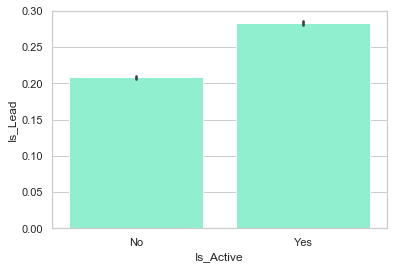

In [198]:
sns.barplot('Is_Active', 'Is_Lead', data=trainingDataset, color="aquamarine")
plt.show()

As seen in the plot above, not much of a difference is present in the likability of buying credit card using customer's Active status

<h3>G. Exploration of Credit Product Variable</h3>

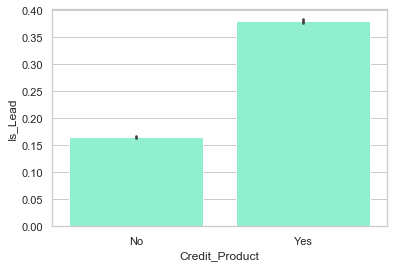

In [199]:
sns.barplot('Credit_Product', 'Is_Lead', data=trainingDataset, color="aquamarine")
plt.show()

Very Significant difference is observed in the customers who have and don't have credit product

<h3>H. Exploration of Channel Code</h3>

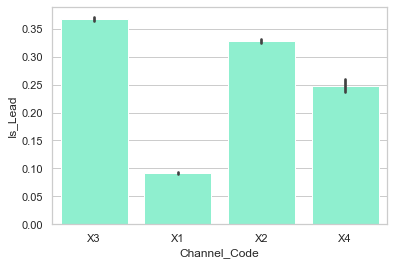

In [200]:
sns.barplot('Channel_Code', 'Is_Lead', data=trainingDataset, color="aquamarine")
plt.show()

It seems that customers with X3 channel code are more likely to buy a credit card

<h1>6. Feature Scaling</h1>

In [201]:
train_data.columns

Index(['Gender', 'Age', 'Vintage', 'Credit_Product', 'Avg_Account_Balance',
       'Is_Active', 'Is_Lead', 'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_Code_X1',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4'],
      dtype='object')

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

columns = ['Gender', 'Age', 'Vintage', 'Credit_Product', 'Occupation_Entrepreneur', 
           'Occupation_Other','Occupation_Salaried','Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3'] 
X = train_data[columns]
y = train_data['Is_Lead']

classifier = LogisticRegression()

rfe = RFE(classifier, 9)
rfe = rfe.fit(X, y)

print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Gender', 'Vintage', 'Credit_Product', 'Occupation_Entrepreneur', 'Occupation_Other', 'Occupation_Salaried', 'Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3']


Optimal number of features: 10
Selected features: ['Gender', 'Age', 'Vintage', 'Credit_Product', 'Occupation_Entrepreneur', 'Occupation_Other', 'Occupation_Salaried', 'Channel_Code_X1', 'Channel_Code_X2', 'Channel_Code_X3']


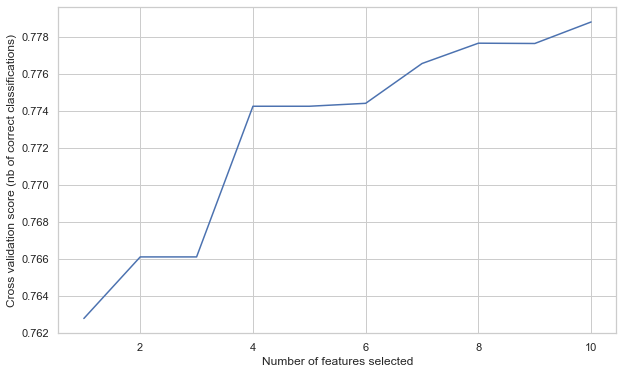

In [210]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = train_data[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))